# GroundWater Level Prediction in India

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

## Libraries Used 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import seaborn as sns
import warnings
import datetime
import math


%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]

#### Ignore Warnings

In [59]:
warnings.filterwarnings('ignore')

#### Loading Dataframe

In [5]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('India_GWL.csv', header=0)

#### First five records

In [6]:
dataframe.head()

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
0,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2018,NaN,1.05,NaN,NaN
1,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2017,NaN,1.50,NaN,34.20
2,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2016,1.55,NaN,1.57,1.84
3,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2015,1.02,1.80,1.82,2.00
4,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2014,2.12,1.88,1.88,1.99


#### Data Type

In [7]:
dataframe['YEAR'].dtype

dtype('int64')

#### Data Type 

In [8]:
dataframe.head()

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
0,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2018,NaN,1.05,NaN,NaN
1,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2017,NaN,1.50,NaN,34.20
2,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2016,1.55,NaN,1.57,1.84
3,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2015,1.02,1.80,1.82,2.00
4,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2014,2.12,1.88,1.88,1.99


# Exploring Time Series Data


#### Size

In [9]:
dataframe.shape

(331292, 14)

### Descriptive Statistics

In [10]:
dataframe.describe()

,LAT,LON,YEAR,MONSOON,POMRB,POMKH,PREMON
count,331292.000000,331292.000000,331292.000000,255662.000000,276962.000000,278782.000000,262803.000000
mean,21.041551,79.126810,2007.885681,6.826723,8.084462,7.224877,9.697176
std,5.819674,4.924398,6.853352,9.983338,9.818163,9.958390,10.409561
min,8.083333,68.533333,1994.000000,-1.780000,-2.190000,-2.330000,-1.880000
25%,17.133333,75.742778,2002.000000,1.780000,3.260000,2.430000,4.590000
50%,21.817222,77.818750,2008.000000,3.950000,5.500000,4.410000,7.170000
75%,25.366667,82.268056,2014.000000,7.960000,9.120000,8.070000,11.030000
max,34.616944,96.133333,2018.000000,534.000000,268.000000,298.520000,534.000000


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331292 entries, 0 to 331291
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STATE       331292 non-null  object 
 1   DISTRICT    331292 non-null  object 
 2   TEH_NAME    331292 non-null  object 
 3   BLOCK_NAME  331292 non-null  object 
 4   LAT         331292 non-null  float64
 5   LON         331292 non-null  float64
 6   SITE_NAME   331292 non-null  object 
 7   SITE_TYPE   331292 non-null  object 
 8   WLCODE      331292 non-null  object 
 9   YEAR        331292 non-null  int64  
 10  MONSOON     255662 non-null  float64
 11  POMRB       276962 non-null  float64
 12  POMKH       278782 non-null  float64
 13  PREMON      262803 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 35.4+ MB


## Data Cleaning

#### Remove Duplicates

In [12]:
dataframe[dataframe.duplicated(keep=False)]

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
5355,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2018,NaN,19.40,NaN,NaN
5390,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2018,NaN,19.40,NaN,NaN
5436,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2017,NaN,27.65,16.10,NaN
5474,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2017,NaN,27.65,16.10,NaN
33406,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2018,NaN,1.83,NaN,NaN
33407,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2018,NaN,1.83,NaN,NaN
33428,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2017,0.67,1.37,1.42,2.12
33429,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2017,0.67,1.37,1.42,2.12


In [13]:
dataframe.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [14]:
dataframe[dataframe.duplicated(keep=False)]

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON


#### Number of States in the data

In [15]:
dataframe.STATE.nunique()

31

#### States in the dataset

In [16]:
dataframe.STATE.unique()

array(['DL', 'PB', 'AN', 'AP', 'AS', 'CH', 'JK', 'ML', 'NL', 'PY', 'TR',
       'WB', 'KA', 'MS', 'CG', 'GJ', 'MP', 'UK', 'GA', 'HP', 'HR', 'AR',
       'BR', 'JH', 'KL', 'MN', 'OD', 'RJ', 'TN', 'TG', 'UP'], dtype=object)

#### Number of Districts in the Dataset

In [17]:
dataframe.DISTRICT.nunique()

560

In [18]:
dataframe.count()

STATE         331288
DISTRICT      331288
TEH_NAME      331288
BLOCK_NAME    331288
LAT           331288
LON           331288
SITE_NAME     331288
SITE_TYPE     331288
WLCODE        331288
YEAR          331288
MONSOON       255661
POMRB         276958
POMKH         278780
PREMON        262802
dtype: int64

#### Handling Null values

#### for MONSOON , POMRB, POMKH, PREMOn -- 23% of data is missing.

In [19]:
dataframe.isnull().sum()

STATE             0
DISTRICT          0
TEH_NAME          0
BLOCK_NAME        0
LAT               0
LON               0
SITE_NAME         0
SITE_TYPE         0
WLCODE            0
YEAR              0
MONSOON       75627
POMRB         54330
POMKH         52508
PREMON        68486
dtype: int64

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331288 entries, 0 to 331287
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STATE       331288 non-null  object 
 1   DISTRICT    331288 non-null  object 
 2   TEH_NAME    331288 non-null  object 
 3   BLOCK_NAME  331288 non-null  object 
 4   LAT         331288 non-null  float64
 5   LON         331288 non-null  float64
 6   SITE_NAME   331288 non-null  object 
 7   SITE_TYPE   331288 non-null  object 
 8   WLCODE      331288 non-null  object 
 9   YEAR        331288 non-null  int64  
 10  MONSOON     255661 non-null  float64
 11  POMRB       276958 non-null  float64
 12  POMKH       278780 non-null  float64
 13  PREMON      262802 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 35.4+ MB


## Monsoon

Mean:  6.826746999048834
Mode:  1.0
Min:  -1.78
Max:  534.0
Median:  3.95
Unique:  6677
Null:  75627
Variance:  99.66726999681316


<AxesSubplot:>

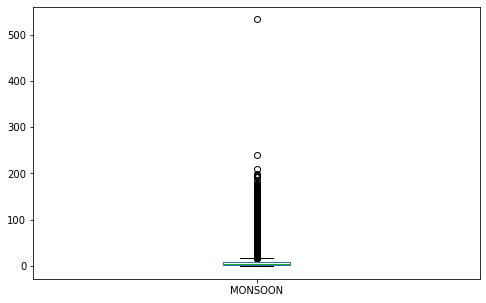

In [21]:
print("Mean: ",dataframe.MONSOON.mean())
print("Mode: ",dataframe.MONSOON.mode()[0])
print("Min: ",dataframe.MONSOON.min())
print("Max: ",dataframe.MONSOON.max())
print("Median: ",dataframe.MONSOON.median())
print("Unique: ",len(dataframe.MONSOON.unique()))
print("Null: ",dataframe.MONSOON.isna().sum())
print("Variance: ",dataframe.MONSOON.var())
dataframe.MONSOON.plot(kind='box')

## Post-Monsoon Rabi

Mean:  8.084397028987658
Mode:  4.1
Min:  -2.19
Max:  268.0
Median:  5.5
Unique:  6813
Null:  54330
Variance:  96.39556474559164


<AxesSubplot:>

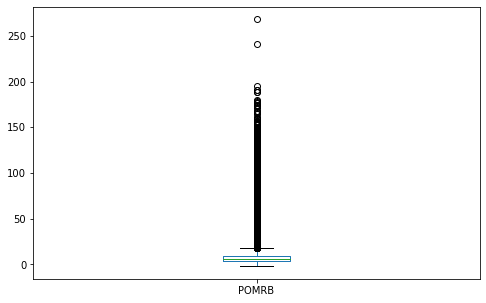

In [22]:
print("Mean: ",dataframe.POMRB.mean())
print("Mode: ",dataframe.POMRB.mode()[0])
print("Min: ",dataframe.POMRB.min())
print("Max: ",dataframe.POMRB.max())
print("Median: ",dataframe.POMRB.median())
print("Unique: ",len(dataframe.POMRB.unique()))
print("Null: ",dataframe.POMRB.isna().sum())
print("Variance: ",dataframe.POMRB.var())
dataframe.POMRB.plot(kind='box')

## Post-Monsoon Kharif

Mean:  7.224866130995637
Mode:  2.0
Min:  -2.33
Max:  298.52
Median:  4.41
Unique:  6900
Null:  52508
Variance:  99.16984329910458


<AxesSubplot:>

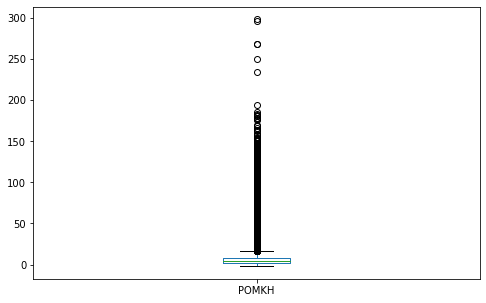

In [23]:
print("Mean: ",dataframe.POMKH.mean())
print("Mode: ",dataframe.POMKH.mode()[0])
print("Min: ",dataframe.POMKH.min())
print("Max: ",dataframe.POMKH.max())
print("Median: ",dataframe.POMKH.median())
print("Unique: ",len(dataframe.POMKH.unique()))
print("Null: ",dataframe.POMKH.isna().sum())
print("Variance: ",dataframe.POMKH.var())
dataframe.POMKH.plot(kind='box')

## Pre-Monsoon

Mean:  9.69720462311161
Mode:  7.0
Min:  -1.88
Max:  534.0
Median:  7.17
Unique:  7085
Null:  68486
Variance:  108.35915050356245


<AxesSubplot:>

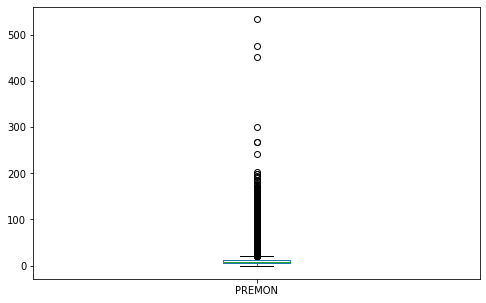

In [24]:
print("Mean: ",dataframe.PREMON.mean())
print("Mode: ",dataframe.PREMON.mode()[0])
print("Min: ",dataframe.PREMON.min())
print("Max: ",dataframe.PREMON.max())
print("Median: ",dataframe.PREMON.median())
print("Unique: ",len(dataframe.PREMON.unique()))
print("Null: ",dataframe.PREMON.isna().sum())
print("Variance: ",dataframe.PREMON.var())
dataframe.PREMON.plot(kind='box')

In [25]:
# Creating a separate dataframe for the missing values & outliers treated data
data_treat = dataframe.copy()

### Null Treatment

In [26]:
data_treat.MONSOON.fillna(data_treat.MONSOON.quantile(0.5), inplace=True)
data_treat.POMKH.fillna(data_treat.POMKH.quantile(0.5), inplace=True)
data_treat.POMRB.fillna(data_treat.POMRB.quantile(0.5), inplace=True)
data_treat.PREMON.fillna(data_treat.PREMON.quantile(0.5), inplace=True)

In [27]:
data_treat.isnull().sum()

STATE         0
DISTRICT      0
TEH_NAME      0
BLOCK_NAME    0
LAT           0
LON           0
SITE_NAME     0
SITE_TYPE     0
WLCODE        0
YEAR          0
MONSOON       0
POMRB         0
POMKH         0
PREMON        0
dtype: int64

### Outlier treatment 

99th quantile value of MONSOON     : 46.77
No of outliers above 99th quantile : 3313


<AxesSubplot:>

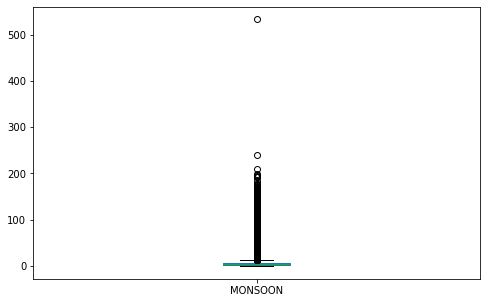

In [28]:
# For MONSOON

print('99th quantile value of MONSOON     :',round(data_treat.MONSOON.quantile(0.99),2))
print('No of outliers above 99th quantile :',len(data_treat[data_treat.MONSOON>data_treat.MONSOON.quantile(0.99)]))
data_treat.MONSOON.plot(kind='box')

<AxesSubplot:>

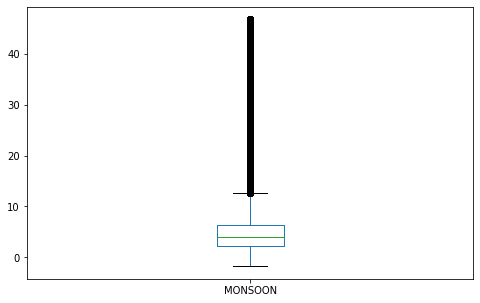

In [29]:
# Removing outliers in MONSOON

data_treat.MONSOON = data_treat.MONSOON.clip(data_treat.MONSOON.quantile(0),data_treat.MONSOON.quantile(0.99))
data_treat.MONSOON.plot(kind='box')

99th quantile value of POMRB       : 48.6
No of outliers above 99th quantile : 3309


<AxesSubplot:>

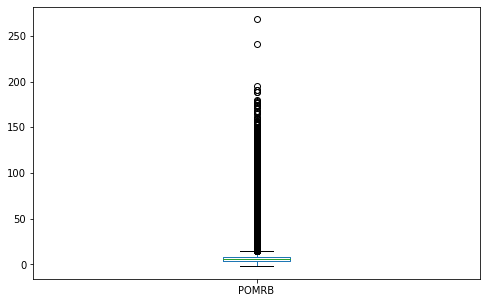

In [30]:
# For POMRB

print('99th quantile value of POMRB       :',round(data_treat.POMRB.quantile(0.99),2))
print('No of outliers above 99th quantile :',len(data_treat[data_treat.POMRB>data_treat.POMRB.quantile(0.99)]))
data_treat.POMRB.plot(kind='box')

<AxesSubplot:>

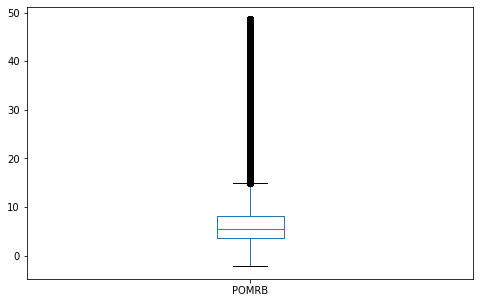

In [31]:
# Removing outliers in POMRB

data_treat.POMRB = data_treat.POMRB.clip(data_treat.POMRB.quantile(0),data_treat.POMRB.quantile(0.99))
data_treat.POMRB.plot(kind='box')

99th quantile value of POMKH       : 48.48
No of outliers above 99th quantile : 3312


<AxesSubplot:>

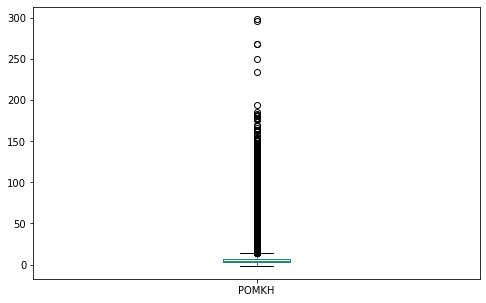

In [32]:
# For POMKH

print('99th quantile value of POMKH       :',round(data_treat.POMKH.quantile(0.99),2))
print('No of outliers above 99th quantile :',len(data_treat[data_treat.POMKH>data_treat.POMKH.quantile(0.99)]))
data_treat.POMKH.plot(kind='box')

<AxesSubplot:>

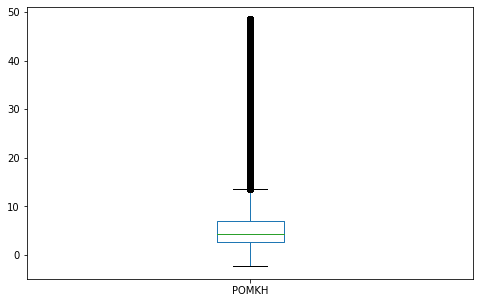

In [33]:
# Removing outliers in POMKH

data_treat.POMKH = data_treat.POMKH.clip(data_treat.POMKH.quantile(0),data_treat.POMKH.quantile(0.99))
data_treat.POMKH.plot(kind='box')

99th quantile value of PREMON      : 50.16
No of outliers above 99th quantile : 3313


<AxesSubplot:>

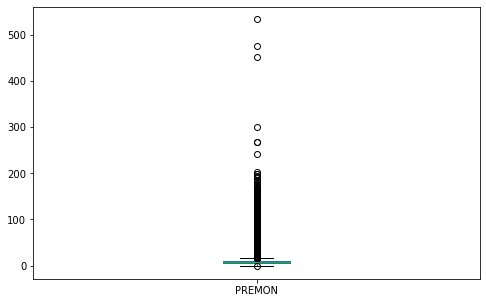

In [34]:
# For PREMON

print('99th quantile value of PREMON      :',round(data_treat.PREMON.quantile(0.99),2))
print('No of outliers above 99th quantile :',len(data_treat[data_treat.PREMON>data_treat.PREMON.quantile(0.99)]))
data_treat.PREMON.plot(kind='box')

<AxesSubplot:>

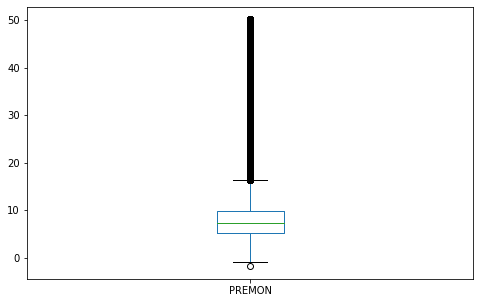

In [35]:
# Removing outliers in PREMON

data_treat.PREMON = data_treat.PREMON.clip(data_treat.PREMON.quantile(0),data_treat.PREMON.quantile(0.99))
data_treat.PREMON.plot(kind='box')

## Models planned and datasets needed for them:

#### 1. data_mn : YEAR & MONSOON
#### 2. data_rb   : YEAR & MONSOON
#### 3. data_kh  : YEAR & MONSOON
#### 4. data_pr   : YEAR & MONSOON
#### 5. data_full : YEAR & MONSOON


### ARIMA - 1,2,3,4
### SARIMA - 5

In [36]:
data_mn = data_treat[['STATE','DISTRICT','YEAR','MONSOON']].copy()
data_mn = data_mn.groupby(['STATE','DISTRICT','YEAR'],as_index=False).mean()

data_rb = data_treat[['STATE','DISTRICT','YEAR','POMRB']].copy()
data_rb = data_rb.groupby(['STATE','DISTRICT','YEAR'],as_index=False).mean()

data_kh = data_treat[['STATE','DISTRICT','YEAR','POMKH']].copy()
data_kh = data_kh.groupby(['STATE','DISTRICT','YEAR'],as_index=False).mean()

data_pr = data_treat[['STATE','DISTRICT','YEAR','PREMON']].copy()
data_pr = data_pr.groupby(['STATE','DISTRICT','YEAR'],as_index=False).mean()

In [37]:
data2 = data_mn.copy()
data3 = data_rb.copy()
data4 = data_kh.copy()
data5 = data_pr.copy()

data2.rename(columns={"MONSOON":'LEVEL'}, inplace = True)
data3.rename(columns={"POMRB":'LEVEL'}, inplace = True)
data4.rename(columns={"POMKH":'LEVEL'}, inplace = True)
data5.rename(columns={"PREMON":'LEVEL'}, inplace = True)

data2.YEAR = data2.YEAR.apply(lambda x: str(x)+"-07-01")
data3.YEAR = data3.YEAR.apply(lambda x: str(x)+"-01-01")
data4.YEAR = data4.YEAR.apply(lambda x: str(x)+"-10-01")
data5.YEAR = data5.YEAR.apply(lambda x: str(x)+"-04-01")

data_full = pd.concat([data2,data3,data4,data5],axis=0)
data_full.YEAR = pd.to_datetime(data_full.YEAR)
data_full.rename(columns={'YEAR':'QUARTER'}, inplace=True)

data_full = data_full.sort_values(["STATE", "DISTRICT","QUARTER"], ascending = True)

data_full.shape

(50152, 4)

In [38]:
data_mn.index = data_mn.YEAR
data_rb.index = data_rb.YEAR
data_kh.index = data_kh.YEAR
data_pr.index = data_pr.YEAR

data_full.index = data_full.QUARTER

In [39]:
# Dropping intermidiate dataframes to release memory
del data2,data3,data4,data5

In [40]:
data_full.DISTRICT.nunique()

560

In [41]:
data_full.isna().sum()

STATE       0
DISTRICT    0
QUARTER     0
LEVEL       0
dtype: int64

In [42]:
data_full.duplicated(keep=False, subset=["STATE", "DISTRICT","QUARTER"]).sum()

0

## Data Visualization

### On district level

<AxesSubplot:ylabel='LEVEL'>

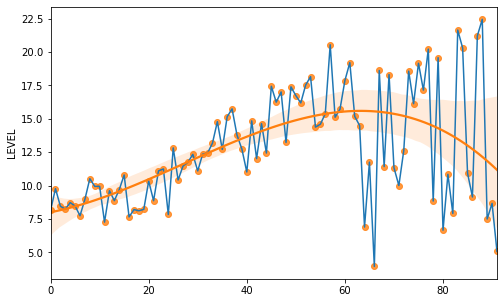

In [43]:
fs_full = data_full['LEVEL'][data_full.DISTRICT=='Fatehgarh Sahib']#.groupby(['QUARTER']).mean()
plt.plot(fs_full.reset_index()['LEVEL'])
sns.regplot(x=fs_full.reset_index().index.values,y=fs_full, order=3)

<AxesSubplot:xlabel='QUARTER'>

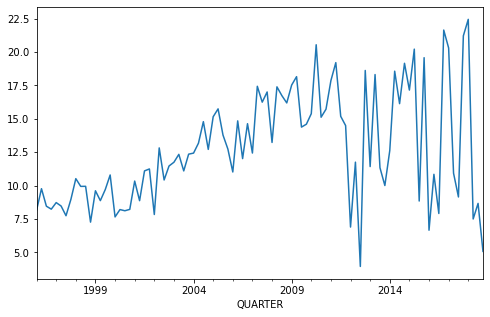

In [44]:
data_full['LEVEL'][data_full.DISTRICT=='Fatehgarh Sahib'].plot()

<AxesSubplot:xlabel='YEAR', ylabel='MONSOON'>

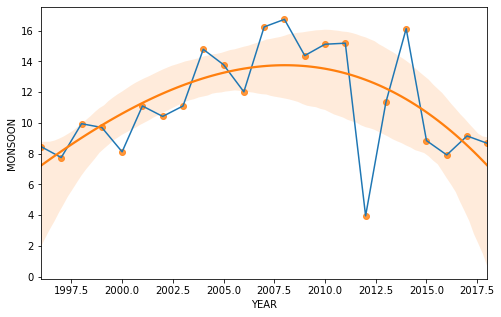

In [45]:
a = data_mn['MONSOON'][data_mn['DISTRICT']=='Fatehgarh Sahib'].groupby(['YEAR']).mean()
a.plot()
sns.regplot(x=a.index.values, y=a, order=3)

<AxesSubplot:xlabel='YEAR', ylabel='POMRB'>

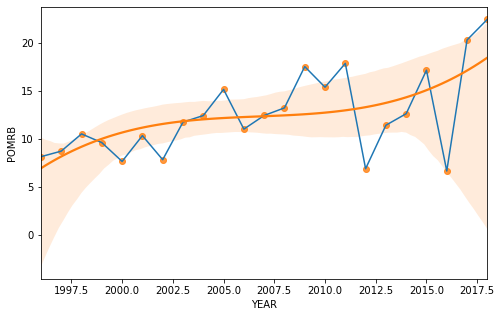

In [46]:
a = data_rb['POMRB'][data_rb['DISTRICT']=='Fatehgarh Sahib'].groupby(['YEAR']).mean()
#print(a)
a.plot()
sns.regplot(x=a.index.values, y=a, order=3)

<AxesSubplot:xlabel='YEAR', ylabel='POMKH'>

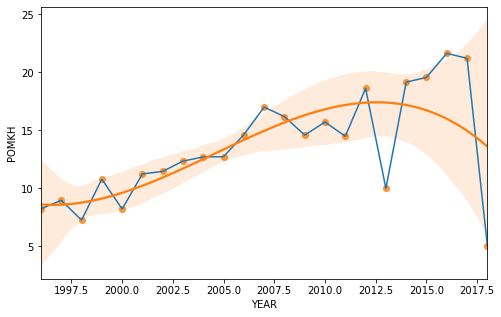

In [47]:
a = data_kh['POMKH'][data_kh['DISTRICT']=='Fatehgarh Sahib'].groupby(['YEAR']).mean()
#print(a)
a.plot()
sns.regplot(x=a.index.values, y=a, order=3)

<AxesSubplot:xlabel='YEAR', ylabel='PREMON'>

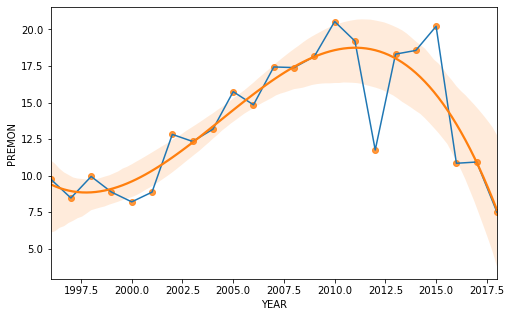

In [48]:
a = data_pr['PREMON'][data_pr['DISTRICT']=='Fatehgarh Sahib'].groupby(['YEAR']).mean()
#print(a)
a.plot()
sns.regplot(x=a.index.values, y=a, order=3)

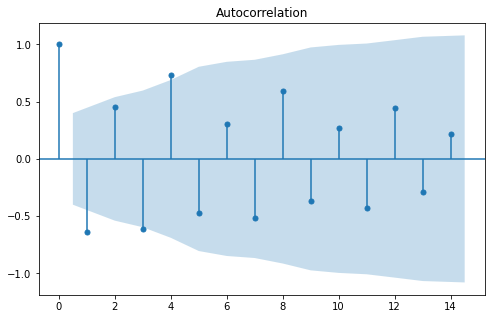

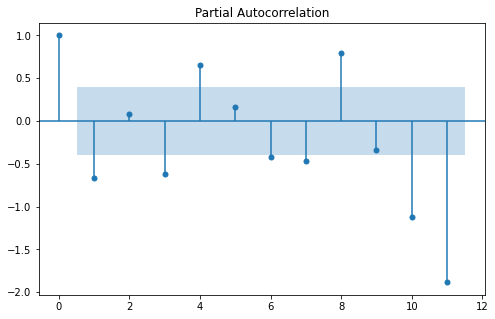

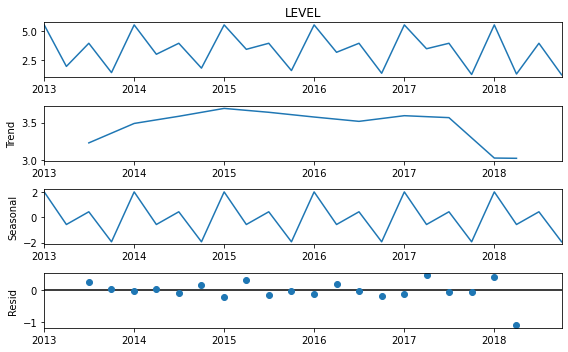

In [60]:
plot_acf(data_full['LEVEL'][data_full.DISTRICT=='South Andaman']).show()
plot_pacf(data_full['LEVEL'][data_full.DISTRICT=='South Andaman'], lags=11).show()

seasonal_decompose(data_full['LEVEL'][data_full.DISTRICT=='South Andaman'], model='additive').plot().show()

In [61]:
# converting dataframe 1,2,3,4 index into date time
data_mn.YEAR = data_mn.YEAR.apply(lambda x: str(x)+"-07-01")
data_mn.index=pd.to_datetime(data_mn.YEAR)

data_rb.YEAR = data_rb.YEAR.apply(lambda x: str(x)+"-01-01")
data_rb.index=pd.to_datetime(data_rb.YEAR)

data_kh.YEAR = data_kh.YEAR.apply(lambda x: str(x)+"-10-01")
data_kh.index=pd.to_datetime(data_kh.YEAR)

data_pr.YEAR = data_pr.YEAR.apply(lambda x: str(x)+"-04-01")
data_pr.index=pd.to_datetime(data_pr.YEAR)

In [62]:
data_mn

,STATE,DISTRICT,YEAR,MONSOON
YEAR,,,,
2013-07-01 07:00:00-01:00,AN,South Andaman,2013-07-01-07-01-07-01,3.950000
2014-07-01 07:00:00-01:00,AN,South Andaman,2014-07-01-07-01-07-01,3.950000
2015-07-01 07:00:00-01:00,AN,South Andaman,2015-07-01-07-01-07-01,3.950000
2016-07-01 07:00:00-01:00,AN,South Andaman,2016-07-01-07-01-07-01,3.950000
2017-07-01 07:00:00-01:00,AN,South Andaman,2017-07-01-07-01-07-01,3.950000
...,...,...,...,...
2014-07-01 07:00:00-01:00,WB,Uttar Dinajpur,2014-07-01-07-01-07-01,2.827143
2015-07-01 07:00:00-01:00,WB,Uttar Dinajpur,2015-07-01-07-01-07-01,2.086471
2016-07-01 07:00:00-01:00,WB,Uttar Dinajpur,2016-07-01-07-01-07-01,3.128519


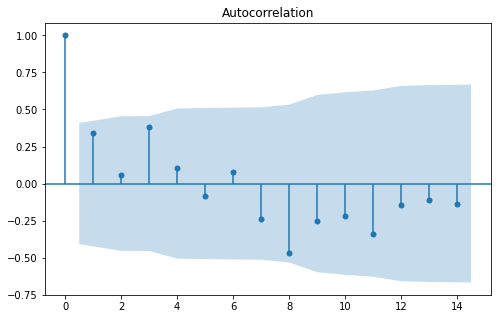

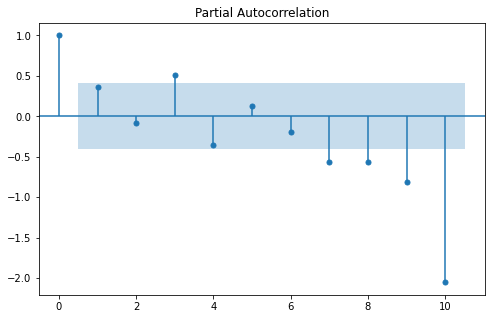

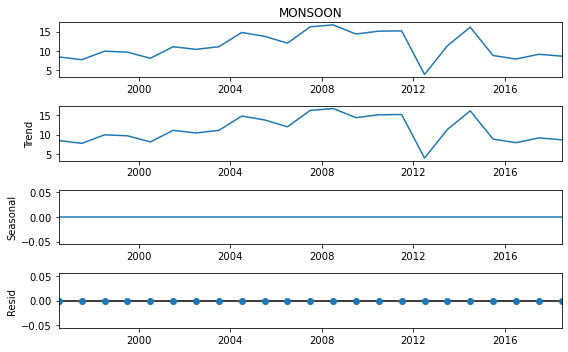

In [63]:
plot_acf(data_mn['MONSOON'][data_mn.DISTRICT=='Fatehgarh Sahib']).show()
plot_pacf(data_mn['MONSOON'][data_mn.DISTRICT=='Fatehgarh Sahib'], lags = 10).show()

seasonal_decompose(data_mn['MONSOON'][data_mn.DISTRICT=='Fatehgarh Sahib'], model='additive').plot().show()

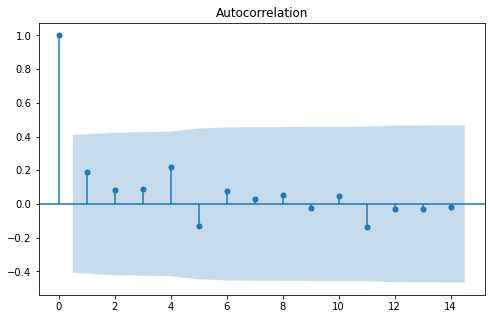

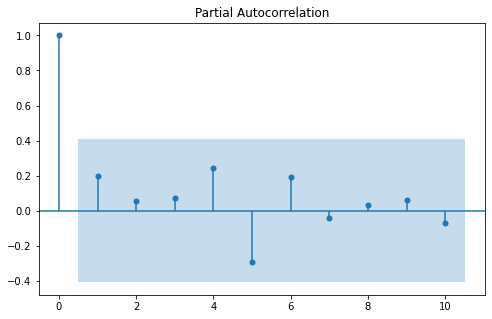

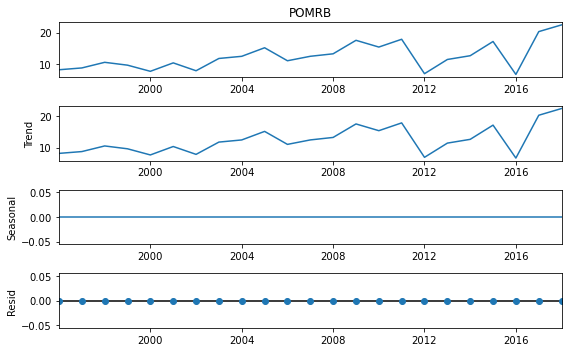

In [65]:
plot_acf(data_rb['POMRB'][data_rb.DISTRICT=='Fatehgarh Sahib']).show()
plot_pacf(data_rb['POMRB'][data_rb.DISTRICT=='Fatehgarh Sahib'], lags =10).show()

seasonal_decompose(data_rb['POMRB'][data_rb.DISTRICT=='Fatehgarh Sahib'], model='additive').plot().show()

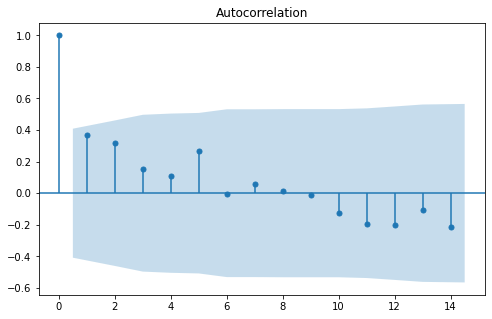

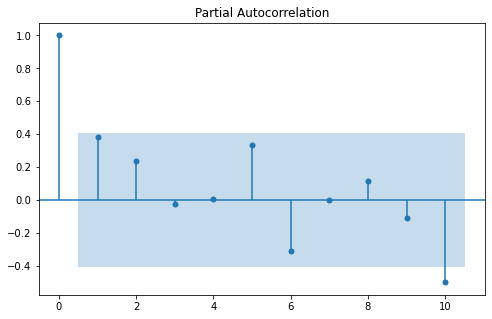

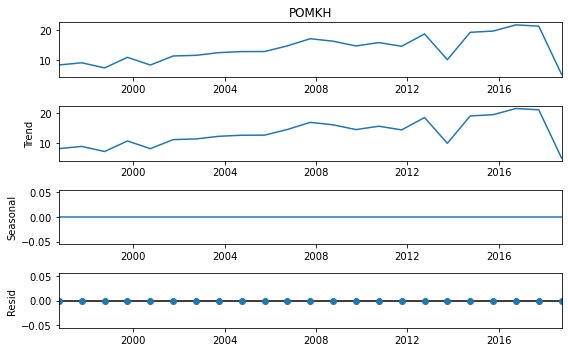

In [67]:
plot_acf(data_kh['POMKH'][data_kh.DISTRICT=='Fatehgarh Sahib']).show()
plot_pacf(data_kh['POMKH'][data_kh.DISTRICT=='Fatehgarh Sahib'],lags = 10).show()

seasonal_decompose(data_kh['POMKH'][data_kh.DISTRICT=='Fatehgarh Sahib'], model='additive').plot().show()

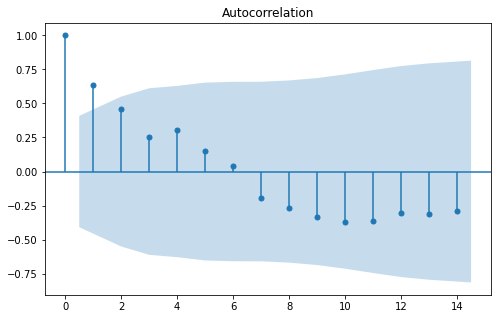

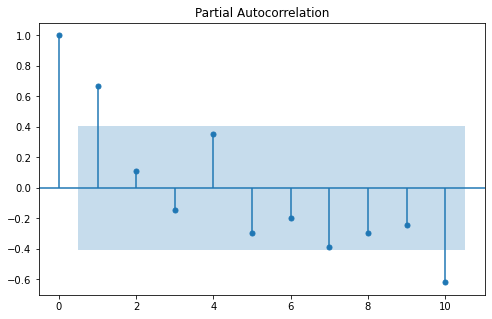

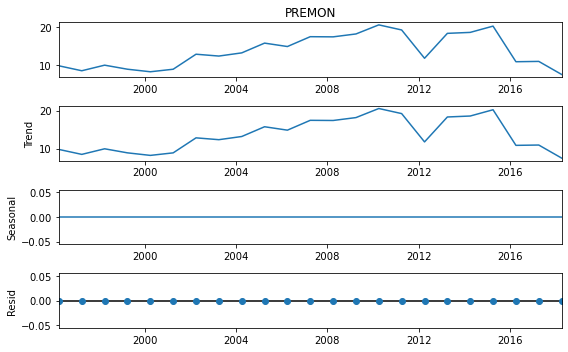

In [68]:
plot_acf(data_pr['PREMON'][data_pr.DISTRICT=='Fatehgarh Sahib']).show()
plot_pacf(data_pr['PREMON'][data_pr.DISTRICT=='Fatehgarh Sahib'],lags=10).show()

seasonal_decompose(data_pr['PREMON'][data_pr.DISTRICT=='Fatehgarh Sahib'], model='additive').plot().show()

<AxesSubplot:xlabel='QUARTER'>

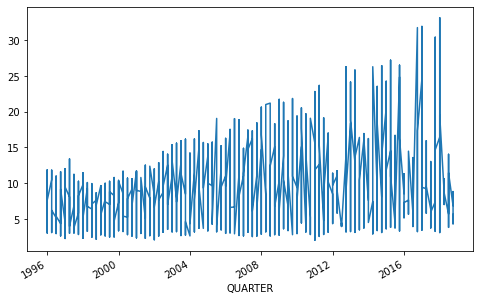

In [69]:
data_full['LEVEL'][data_full.STATE=='PB'].plot()

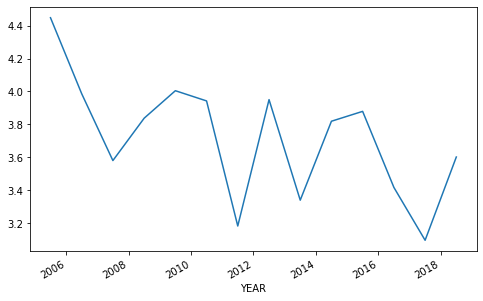

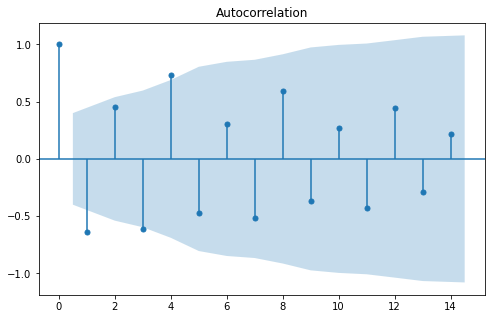

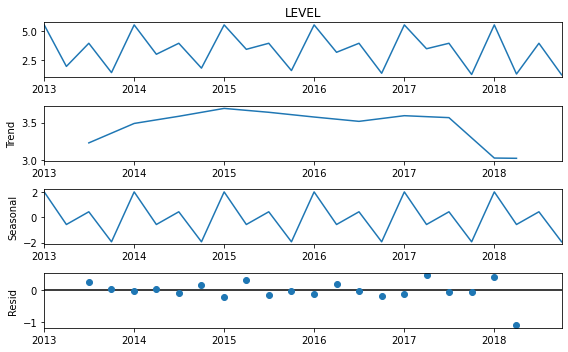

In [70]:
data_mn['MONSOON'][data_mn['STATE']=='GA'].groupby(['YEAR']).mean().plot()

#data_full['LEVEL'][data_full.DISTRICT=='South Andaman'].plot()

plot_acf(data_full['LEVEL'][data_full.DISTRICT=='South Andaman']).show()

seasonal_decompose(data_full['LEVEL'][data_full.DISTRICT=='South Andaman'], model='additive').plot().show()

YEAR
2005-07-01 07:00:00-01:00    4.448433
2006-07-01 07:00:00-01:00    3.986112
2007-07-01 07:00:00-01:00    3.579292
2008-07-01 07:00:00-01:00    3.837133
2009-07-01 07:00:00-01:00    4.004339
2010-07-01 07:00:00-01:00    3.942136
2011-07-01 07:00:00-01:00    3.181211
2012-07-01 07:00:00-01:00    3.950000
2013-07-01 07:00:00-01:00    3.338389
2014-07-01 07:00:00-01:00    3.818619
2015-07-01 07:00:00-01:00    3.878654
2016-07-01 07:00:00-01:00    3.415711
2017-07-01 07:00:00-01:00    3.094436
2018-07-01 07:00:00-01:00    3.600972
Name: MONSOON, dtype: float64


UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

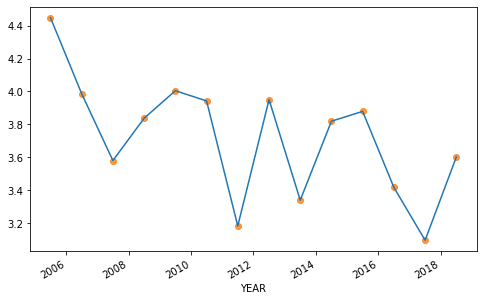

In [71]:
a = data_mn['MONSOON'][data_mn['STATE']=='GA'].groupby(['YEAR']).mean()
a.plot()
print(a)
sns.regplot(x=a.index.values, y=a, order=3)